# Relax Inc. Take-Home Challenge
Using data from Relax Inc., I will help identify which factors predict future user adoption. For reference, an adopted user is a user who has logged into the product on three separate days in at least one seven-day period. The dataset includes a user table with data on 12,000 users who signed up for the product in the last two years as well as a usage summary table that has a row for each day that a user logged into the product. Using these two datasets, I will be able to find some features that help predict future user adoption.

In [1]:
# Importing necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_context("poster")
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

In [2]:
# Uploading and inspecting the Users CSV
df_users = pd.read_csv('/Users/dwreiter/Desktop/Work/Springboard/Data Stuff/relax_challenge/takehome_users.csv')
df_users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [3]:
# Checking out missing values
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
# Seeing missing values for last_session_creation_time
df_users['last_session_creation_time']

0        1.398139e+09
1        1.396238e+09
2        1.363735e+09
3        1.369210e+09
4        1.358850e+09
5        1.387424e+09
6        1.356010e+09
7                 NaN
8                 NaN
9        1.401833e+09
10       1.388117e+09
11                NaN
12       1.396196e+09
13       1.350058e+09
14                NaN
15                NaN
16       1.397314e+09
17                NaN
18       1.369926e+09
19       1.401364e+09
20       1.358858e+09
21       1.392012e+09
22       1.345279e+09
23       1.378765e+09
24       1.393373e+09
25                NaN
26       1.389807e+09
27       1.360872e+09
28       1.379384e+09
29       1.370307e+09
             ...     
11970             NaN
11971             NaN
11972             NaN
11973    1.356713e+09
11974    1.400757e+09
11975             NaN
11976    1.379704e+09
11977             NaN
11978    1.359624e+09
11979    1.397835e+09
11980    1.364868e+09
11981    1.386341e+09
11982    1.375144e+09
11983    1.392154e+09
11984     

** Since an "NaN" means that the user has not logged in, I will change those values to zeroes.**

In [5]:
# Filling in NaNs
df_users['last_session_creation_time'] = df_users['last_session_creation_time'].fillna(0)
df_users['last_session_creation_time']

0        1.398139e+09
1        1.396238e+09
2        1.363735e+09
3        1.369210e+09
4        1.358850e+09
5        1.387424e+09
6        1.356010e+09
7        0.000000e+00
8        0.000000e+00
9        1.401833e+09
10       1.388117e+09
11       0.000000e+00
12       1.396196e+09
13       1.350058e+09
14       0.000000e+00
15       0.000000e+00
16       1.397314e+09
17       0.000000e+00
18       1.369926e+09
19       1.401364e+09
20       1.358858e+09
21       1.392012e+09
22       1.345279e+09
23       1.378765e+09
24       1.393373e+09
25       0.000000e+00
26       1.389807e+09
27       1.360872e+09
28       1.379384e+09
29       1.370307e+09
             ...     
11970    0.000000e+00
11971    0.000000e+00
11972    0.000000e+00
11973    1.356713e+09
11974    1.400757e+09
11975    0.000000e+00
11976    1.379704e+09
11977    0.000000e+00
11978    1.359624e+09
11979    1.397835e+09
11980    1.364868e+09
11981    1.386341e+09
11982    1.375144e+09
11983    1.392154e+09
11984    0

In [6]:
# Seeing missing values for invited_by_user_id
df_users['invited_by_user_id']

0        10803.0
1          316.0
2         1525.0
3         5151.0
4         5240.0
5        11241.0
6            NaN
7            NaN
8            NaN
9         4143.0
10           NaN
11        9270.0
12       11204.0
13           NaN
14           NaN
15           NaN
16        1600.0
17        3153.0
18           NaN
19           NaN
20           NaN
21        2994.0
22          23.0
23           NaN
24        6312.0
25       11857.0
26        4189.0
27           NaN
28           NaN
29        4835.0
          ...   
11970    11854.0
11971     7012.0
11972        NaN
11973        NaN
11974     6410.0
11975        NaN
11976        NaN
11977        NaN
11978        NaN
11979     3068.0
11980     5775.0
11981     2527.0
11982        NaN
11983        NaN
11984        NaN
11985        NaN
11986        NaN
11987        NaN
11988        NaN
11989     3944.0
11990        NaN
11991        NaN
11992        NaN
11993     5450.0
11994        NaN
11995     8263.0
11996        NaN
11997     8074

** Since an "NaN" means that someone else did not invite the user, I will change those values to zeroes.**

In [7]:
# Filling in NaNs
df_users['invited_by_user_id'] = df_users['invited_by_user_id'].fillna(0)
df_users['invited_by_user_id']

0        10803.0
1          316.0
2         1525.0
3         5151.0
4         5240.0
5        11241.0
6            0.0
7            0.0
8            0.0
9         4143.0
10           0.0
11        9270.0
12       11204.0
13           0.0
14           0.0
15           0.0
16        1600.0
17        3153.0
18           0.0
19           0.0
20           0.0
21        2994.0
22          23.0
23           0.0
24        6312.0
25       11857.0
26        4189.0
27           0.0
28           0.0
29        4835.0
          ...   
11970    11854.0
11971     7012.0
11972        0.0
11973        0.0
11974     6410.0
11975        0.0
11976        0.0
11977        0.0
11978        0.0
11979     3068.0
11980     5775.0
11981     2527.0
11982        0.0
11983        0.0
11984        0.0
11985        0.0
11986        0.0
11987        0.0
11988        0.0
11989     3944.0
11990        0.0
11991        0.0
11992        0.0
11993     5450.0
11994        0.0
11995     8263.0
11996        0.0
11997     8074

In [8]:
# Now there are no more missing values
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [9]:
# Uploading and inspecting the User Engagement CSV
df_users_eng = pd.read_csv('/Users/dwreiter/Desktop/Work/Springboard/Data Stuff/relax_challenge/takehome_user_engagement.csv')
df_users_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
# No missing values
df_users_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


** To discover the adopted users, we must find out who has logged on at least 3 times in the span of 7 days. First, we will find out those who logged on at least 3 times followed by which did it in a week or less.**

In [11]:
# Filtering out the amount of users who logged in at least 3 times
engage = df_users_eng.groupby('user_id').filter(lambda x: len(x) >= 3)
engage.reset_index(drop=True, inplace = True) 
engage

,time_stamp,user_id,visited
0,2013-11-15 03:45:04,2,1
1,2013-11-29 03:45:04,2,1
2,2013-12-09 03:45:04,2,1
3,2013-12-25 03:45:04,2,1
4,2013-12-31 03:45:04,2,1
5,2014-01-08 03:45:04,2,1
6,2014-02-03 03:45:04,2,1
7,2014-02-08 03:45:04,2,1
8,2014-02-09 03:45:04,2,1
9,2014-02-13 03:45:04,2,1


In [12]:
# A For Loop that creates a week from a date and then checks if the next two dates fall within that range
active = 0
adopted_users = []
for i in range(len(engage)-2):
    user = engage['user_id'][i]
    if user != active and user == engage['user_id'][i+2]:
        st = pd.Timestamp(engage['time_stamp'][i])
        et = st + pd.Timedelta('7D')
        if st < pd.Timestamp(engage['time_stamp'][i+1]) < et and st < pd.Timestamp(engage['time_stamp'][i+2]) < et:
            adopted_users.append(user)
            active = user
            
# Finding out the amount of adopted users
len(adopted_users)

1602

** Now we know there are a little over 1,600 adopted users. The next step is adding this data to the Users DataFrame so we know which people are adopted users.**

In [13]:
# Creating a Series of the Adopted Users to help create a DataFrame
s = pd.Series(np.random.randn(len(df_users)))
n = 0
for i in range(len(df_users)):
    if df_users['object_id'][i] == adopted_users[n]:
        s[i] = 1
        n = n+1
        if n > len(adopted_users)-1:
            n = n -1
    else:
        s[i] = 0
s.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [14]:
# Creating a DataFrame from the Series and concatenating it with the Users DataFrame
df_adopted_users = pd.DataFrame(s, columns=['active_users'])
df = pd.concat([df_users, df_adopted_users], axis = 1)
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_users
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [15]:
# Making columns for each type of creation_source
df['personal_projects'] = (df['creation_source'] == 'PERSONAL_PROJECTS').astype(int)
df['guest_invite'] = (df['creation_source'] == 'GUEST_INVITE').astype(int)
df['org_invite'] = (df['creation_source'] == 'ORG_INVITE').astype(int)
df['signup'] = (df['creation_source'] == 'SIGNUP').astype(int)
df['signup_google_auth'] = (df['creation_source'] == 'SIGNUP_GOOGLE_AUTH').astype(int)
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_users,personal_projects,guest_invite,org_invite,signup,signup_google_auth
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0,1,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,0,0,1,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0,0,1,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0,1,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0,1,0,0,0


** Now that all of this information is in one DataFrame, we can start seeing which factors predict future user adoption.**

** In order to find the most important features, I will run the data through a Random Forest Classifier. This is useful because it automatically cross-validates the data as well as allows us to easily see the important features. I will leave out factors like last_session_creation_time because that is too obvious and will likely have the biggest impact on the predictions. Instead, we want to focus on more general features which will lead to better analysis of their impact.**

In [16]:
# Setting up X and y as well as splitting them into training and testing sets
X = df[['opted_in_to_mailing_list','enabled_for_marketing_drip', 'personal_projects', 'guest_invite', 'org_invite', 'signup','signup_google_auth']]
y = df['active_users']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [17]:
# Setting up the Random Forest Classifier followed by fitting and predicting on the data
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_score = metrics.accuracy_score(y_test, rf_pred)
print('Accuracy Score: ' + str(rf_score))

Accuracy Score: 0.866666666667


** This is pretty accurate model with about 87% accuracy. Now we will see which features had the biggest impact.**

In [18]:
# Calculating Feature Importance from the Random Forest Classifier
rf_feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
rf_feature_imp

personal_projects             0.456461
guest_invite                  0.150914
enabled_for_marketing_drip    0.099821
opted_in_to_mailing_list      0.099028
signup_google_auth            0.084004
org_invite                    0.062414
signup                        0.047357
dtype: float64

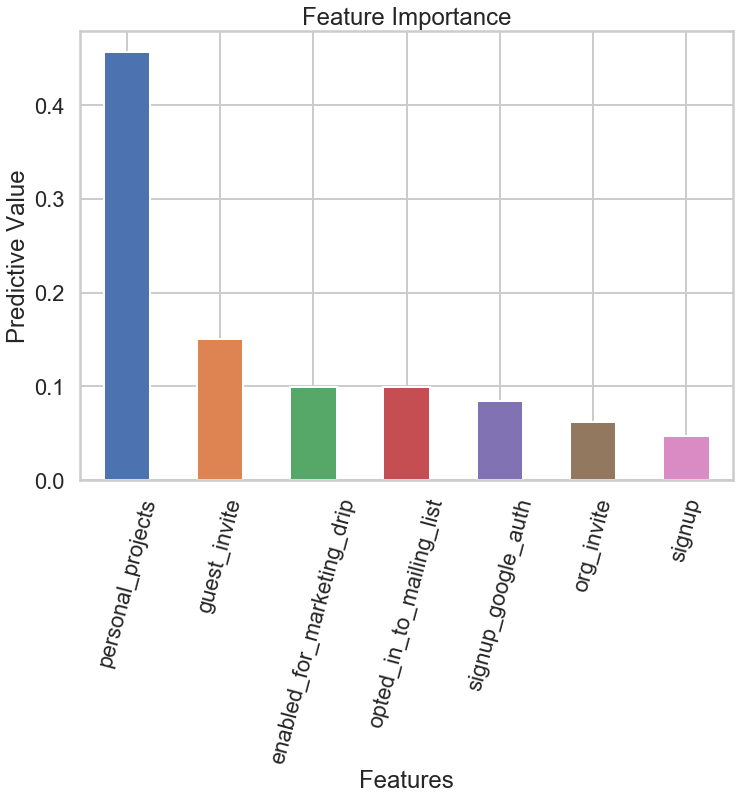

In [19]:
# Plotting Feature Importance
_ = rf_feature_imp.plot(kind='bar')
_ = plt.xticks(rotation=75)
_ = plt.xlabel('Features')
_ = plt.ylabel('Predictive Value')
_ = plt.title('Feature Importance')

** Based on the classifier as well as the above plot, it appears that personal_projects, or being invited to join another user's personal workspace, has the biggest impact on creating user adoption at around 46%. There is a steep drop before guest_invite, or being invited to an organization as a guest (limited permissions), follows with the second biggest impact, around 15%. After that, being on the regular marketing email drip and opting into receiving marketing emails are both around 10%. Lastly, the final 3 types of account creation are all under 10%.**

## Conclusion
When it comes to predicting future user adoption, the most important factors are account creations like being invited to join another user's personal workspace as well as being invited to an organization as a guest, with limited permissions. This means those that are invited in more of a personal or friendly setting are more likely to continue to use the product moving forward. To dive deeper into this problem, I think it would be good to know what types of projects these people were invited to join, which may help explain why they continued to use the product afterward. Right now this data is more vague so further specificity could help explain why people continued with the program.